In [1]:
import pandas as pd
import numpy as np

PATH = '/home/kai/data/kaggle/homecredit/'

train_cleaned = pd.read_pickle(PATH + 'train_cleaned.pkl')
test_cleaned = pd.read_pickle(PATH + 'test_cleaned.pkl')
print('done')

done


In [2]:
from sklearn.preprocessing import LabelEncoder

categorical_feats = [
    'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
]

for x in categorical_feats:
    if train_cleaned[x].dtype == 'object':
        print(x)
        train_cleaned[x].fillna('na', inplace=True)
        test_cleaned[x].fillna('na', inplace=True)
        train_cleaned[x] = LabelEncoder().fit_transform(train_cleaned[x])
        test_cleaned[x] = LabelEncoder().fit_transform(test_cleaned[x])
    else:
        train_cleaned[x].fillna('na', inplace=True)
        test_cleaned[x].fillna('na', inplace=True)
print('done')

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
done


In [3]:
target = train_cleaned['TARGET']
ignore_cols = ['ORGANIZATION_TYPE', 'TARGET', 'SK_ID_CURR']
features = [x for x in train_cleaned.columns if x not in ignore_cols]
train = train_cleaned[features]
test = test_cleaned[features]

# Scaling

In [4]:
numerical_features= ['bureau_DAYS_CREDIT_max'
 ,'bureau_DAYS_CREDIT_min',
 'bureau_DAYS_CREDIT_std',
 'bureau_DAYS_CREDIT_mean',
 'bureau_DAYS_CREDIT_ENDDATE_max',
 'bureau_DAYS_CREDIT_ENDDATE_min',
 'bureau_DAYS_CREDIT_ENDDATE_std',
 'bureau_DAYS_CREDIT_ENDDATE_mean',
 'bureau_AMT_CREDIT_SUM_max',
 'bureau_AMT_CREDIT_SUM_min',
 'bureau_AMT_CREDIT_SUM_std',
 'bureau_AMT_CREDIT_SUM_mean',
 'bureau_AMT_CREDIT_SUM_LIMIT_max',
 'bureau_AMT_CREDIT_SUM_LIMIT_min',
 'bureau_AMT_CREDIT_SUM_LIMIT_std',
 'bureau_AMT_CREDIT_SUM_LIMIT_mean',
 'bureau_DAYS_CREDIT_UPDATE_max',
 'bureau_DAYS_CREDIT_UPDATE_min',
 'bureau_DAYS_CREDIT_UPDATE_std',
 'bureau_DAYS_CREDIT_UPDATE_mean',
 'bureau_AMT_ANNUITY_max',
 'bureau_AMT_ANNUITY_min',
 'bureau_AMT_ANNUITY_std',
 'bureau_AMT_ANNUITY_mean',
 'bureau_bureau_balance_score_max',
 'bureau_bureau_balance_score_min',
 'bureau_bureau_balance_score_std',
 'bureau_bureau_balance_score_mean',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_max',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_min',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_std',
 'bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_mean',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_max',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_min',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_std',
 'bureau_AMT_CREDIT_SUM_LIMIT_AMT_CREDIT_SUM_ratio_mean',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_max',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_min',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_std',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_mean',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_max',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_min',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_std',
 'bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_OVERDUE_ratio_mean',
 'bureau_bb_STATUS_count_max',
 'bureau_bb_STATUS_count_min',
 'bureau_bb_STATUS_count_std',
 'bureau_bb_STATUS_count_mean',
 'bureau_CREDIT_DAY_OVERDUE_max',
 'bureau_CREDIT_DAY_OVERDUE_min',
 'bureau_CREDIT_DAY_OVERDUE_std',
 'bureau_CREDIT_DAY_OVERDUE_mean',
 'bureau_CREDIT_DAY_OVERDUE_positive_count',
 'bureau_AMT_CREDIT_MAX_OVERDUE_max',
 'bureau_AMT_CREDIT_MAX_OVERDUE_min',
 'bureau_AMT_CREDIT_MAX_OVERDUE_std',
 'bureau_AMT_CREDIT_MAX_OVERDUE_mean',
 'bureau_AMT_CREDIT_MAX_OVERDUE_positive_count',
 'bureau_AMT_CREDIT_SUM_OVERDUE_max',
 'bureau_AMT_CREDIT_SUM_OVERDUE_min',
 'bureau_AMT_CREDIT_SUM_OVERDUE_std',
 'bureau_AMT_CREDIT_SUM_OVERDUE_mean',
 'bureau_AMT_CREDIT_SUM_OVERDUE_positive_count',
 'bureau_CNT_CREDIT_PROLONG_max',
 'bureau_CNT_CREDIT_PROLONG_min',
 'bureau_CNT_CREDIT_PROLONG_std',
 'bureau_CNT_CREDIT_PROLONG_mean',
 'bureau_CNT_CREDIT_PROLONG_positive_count',
 'bureau_AMT_CREDIT_SUM_DEBT_max',
 'bureau_AMT_CREDIT_SUM_DEBT_min',
 'bureau_AMT_CREDIT_SUM_DEBT_std',
 'bureau_AMT_CREDIT_SUM_DEBT_mean',
 'bureau_AMT_CREDIT_SUM_DEBT_positive_count',
 'bureau_AMT_CREDIT_SUM_DEBT_negative_count',
 'bureau_SK_ID_BUREAU_count'
                    ]

In [5]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
train[numerical_features] = \
train[numerical_features].fillna(-3.4*(10**8))
test[numerical_features] = \
test[numerical_features].fillna(-3.4*(10**8))
for col in numerical_features:
    print(col)
    train[train[col] == np.inf] = 3.4*(10**8)

/home/kai/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


bureau_DAYS_CREDIT_max


/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/kai/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


bureau_DAYS_CREDIT_min
bureau_DAYS_CREDIT_std
bureau_DAYS_CREDIT_mean
bureau_DAYS_CREDIT_ENDDATE_max
bureau_DAYS_CREDIT_ENDDATE_min
bureau_DAYS_CREDIT_ENDDATE_std
bureau_DAYS_CREDIT_ENDDATE_mean
bureau_AMT_CREDIT_SUM_max
bureau_AMT_CREDIT_SUM_min
bureau_AMT_CREDIT_SUM_std
bureau_AMT_CREDIT_SUM_mean
bureau_AMT_CREDIT_SUM_LIMIT_max
bureau_AMT_CREDIT_SUM_LIMIT_min
bureau_AMT_CREDIT_SUM_LIMIT_std
bureau_AMT_CREDIT_SUM_LIMIT_mean
bureau_DAYS_CREDIT_UPDATE_max
bureau_DAYS_CREDIT_UPDATE_min
bureau_DAYS_CREDIT_UPDATE_std
bureau_DAYS_CREDIT_UPDATE_mean
bureau_AMT_ANNUITY_max
bureau_AMT_ANNUITY_min
bureau_AMT_ANNUITY_std
bureau_AMT_ANNUITY_mean
bureau_bureau_balance_score_max
bureau_bureau_balance_score_min
bureau_bureau_balance_score_std
bureau_bureau_balance_score_mean
bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_max
bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_min
bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_std
bureau_CNT_CREDIT_PROLONG_DAYS_CREDIT_ratio_mean
bureau_AMT_CREDIT_SUM_LIMIT_AMT_CRE

In [6]:
for col in numerical_features:
    print(col)
    test[test[col] == np.inf] = 3.4*(10**38)

bureau_DAYS_CREDIT_max


/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kai/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


bureau_DAYS_CREDIT_min
bureau_DAYS_CREDIT_std
bureau_DAYS_CREDIT_mean
bureau_DAYS_CREDIT_ENDDATE_max
bureau_DAYS_CREDIT_ENDDATE_min
bureau_DAYS_CREDIT_ENDDATE_std
bureau_DAYS_CREDIT_ENDDATE_mean
bureau_AMT_CREDIT_SUM_max
bureau_AMT_CREDIT_SUM_min
bureau_AMT_CREDIT_SUM_std
bureau_AMT_CREDIT_SUM_mean
bureau_AMT_CREDIT_SUM_LIMIT_max
bureau_AMT_CREDIT_SUM_LIMIT_min
bureau_AMT_CREDIT_SUM_LIMIT_std
bureau_AMT_CREDIT_SUM_LIMIT_mean
bureau_DAYS_CREDIT_UPDATE_max
bureau_DAYS_CREDIT_UPDATE_min


KeyboardInterrupt: 

In [8]:
for col in numerical_features:
    print(col, train[col].isnull().sum())
#     print(col)
    train[col] = scale.fit_transform(train[col].values.reshape(-1,1)).ravel()
#     test[col] = scale.fit_transform(test[col].values.reshape(-1,1)).ravel()

bureau_DAYS_CREDIT_max 0
bureau_DAYS_CREDIT_min 0
bureau_DAYS_CREDIT_std 0
bureau_DAYS_CREDIT_mean 0
bureau_DAYS_CREDIT_ENDDATE_max 

/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0
bureau_DAYS_CREDIT_ENDDATE_min 0
bureau_DAYS_CREDIT_ENDDATE_std 0
bureau_DAYS_CREDIT_ENDDATE_mean 0
bureau_AMT_CREDIT_SUM_max 0
bureau_AMT_CREDIT_SUM_min 0
bureau_AMT_CREDIT_SUM_std 0
bureau_AMT_CREDIT_SUM_mean 0
bureau_AMT_CREDIT_SUM_LIMIT_max 0
bureau_AMT_CREDIT_SUM_LIMIT_min 0
bureau_AMT_CREDIT_SUM_LIMIT_std 0
bureau_AMT_CREDIT_SUM_LIMIT_mean 0
bureau_DAYS_CREDIT_UPDATE_max 0
bureau_DAYS_CREDIT_UPDATE_min 0
bureau_DAYS_CREDIT_UPDATE_std 0
bureau_DAYS_CREDIT_UPDATE_mean 0
bureau_AMT_ANNUITY_max 0
bureau_AMT_ANNUITY_min 0
bureau_AMT_ANNUITY_std 0
bureau_AMT_ANNUITY_mean 0
bureau_bureau_balance_score_max 0


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [4]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgbm

lgbm_train = lgbm.Dataset(data=train,
                          label=target,
                          
                          categorical_feature=categorical_feats,
                          free_raw_data=False)

lgbm_params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}

# lgbm_params = {
#     'objective': 'binary',
#     'boosting': 'gbdt',
#     'num_boost_round': 5000,
#     'learning_rate': 0.04,
#     'num_leaves': 76,
#     'num_threads': 20, # best speed: set to number of real cpu cores, which is vCPU/2
#     'device': 'cpu',
#     'max_depth': 7, # no limit. This is used to deal with over-fitting when #data is small.
#     'min_child_samples': 20,
#     'min_child_weight': 5,
#     'min_split_gain': 0,
#     'reg_alpha': 0,
#     'reg_lambda': 0.1,
#     'subsample': 1.0,
#     'subsample_for_bin': 200000,
#     'subsample_freq': 1,
#     'bagging_seed': 2018,
#     'early_stopping_round':300,
#     'verbose': 0,
#     'scale_pos_weight': 1,#*0.00246100785192494,
#     'metric' : [ 'auc'],
#     'feature_fraction': 0.8,
#     'drop_seed': 2018,
#     'data_random_seed': 2018,
#     'max_bin': 188,
#     'colsample_bytree': 0.45
# }

# lgbm_params = {
#     'boosting': 'dart',
#     'application': 'binary',
#     'learning_rate': 0.1,
#     'min_data_in_leaf': 30,
#     'num_leaves': 31,
#     'max_depth': -1,
#     'feature_fraction': 0.5,
#     'scale_pos_weight': 2,
#     'drop_rate': 0.02
# }

cv_results = lgbm.cv(train_set=lgbm_train,
                     params=lgbm_params,
                     nfold=5,
                     early_stopping_rounds=150,
                     verbose_eval=200,
                     metrics=['auc'])

optimum_boost_rounds = np.argmax(cv_results['auc-mean'])
print('Optimum boost rounds = {}'.format(optimum_boost_rounds))
print('Best CV result = {}'.format(np.max(cv_results['auc-mean'])))

clf = lgbm.train(train_set=lgbm_train,
                 params=lgbm_params,
                 num_boost_round=optimum_boost_rounds)

""" Predict on test set and create submission """
y_pred = clf.predict(test)
out_df = pd.DataFrame({'SK_ID_CURR': test_cleaned['SK_ID_CURR'], 'TARGET': y_pred})
print('done')

/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:390: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1027: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[200]	cv_agg's auc: 0.741077 + 0.00380164
[400]	cv_agg's auc: 0.753427 + 0.00378094
[600]	cv_agg's auc: 0.761914 + 0.0034568
[800]	cv_agg's auc: 0.765957 + 0.00308358
[1000]	cv_agg's auc: 0.767876 + 0.002804
[1200]	cv_agg's auc: 0.768942 + 0.00278997
[1400]	cv_agg's auc: 0.76943 + 0.00276759
[1600]	cv_agg's auc: 0.769664 + 0.00267884
[1800]	cv_agg's auc: 0.769863 + 0.00267652
[2000]	cv_agg's auc: 0.76987 + 0.00269965
[2200]	cv_agg's auc: 0.76992 + 0.00265443
Optimum boost rounds = 2225
Best CV result = 0.7699439020451108
done


In [5]:
print((out_df['TARGET']>0.5).sum())

137


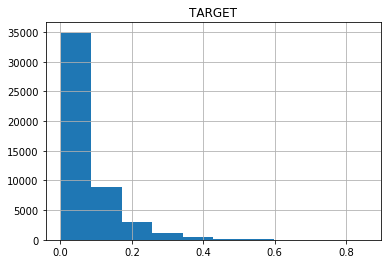

In [6]:
import matplotlib.pyplot as plt
out_df[['TARGET']].hist()
plt.show()

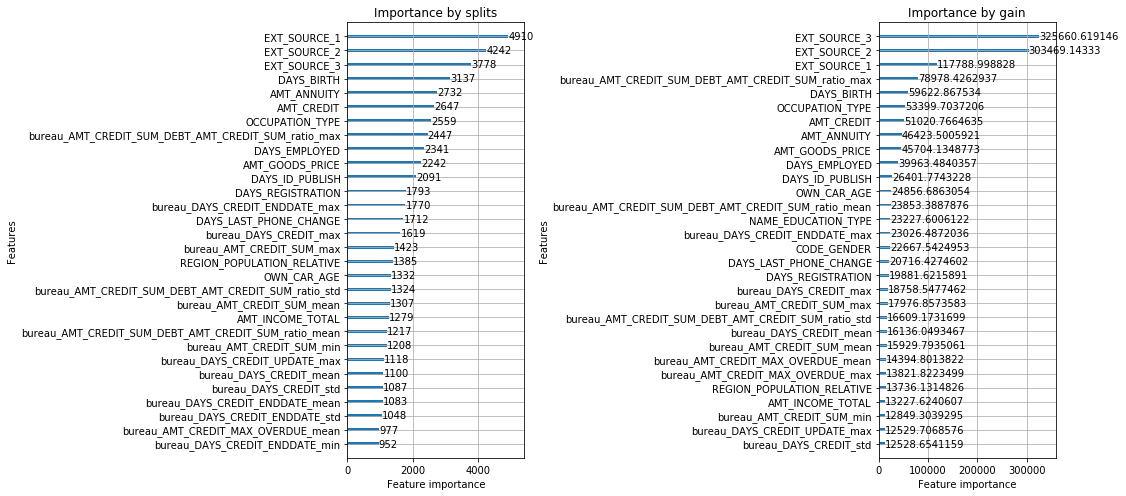

In [10]:
import matplotlib.pyplot as plt

fig, (ax, ax1) = plt.subplots(1, 2, figsize=[15, 7])
lgbm.plot_importance(clf, ax=ax, max_num_features=30, importance_type='split')
lgbm.plot_importance(clf, ax=ax1, max_num_features=30, importance_type='gain')
ax.set_title('Importance by splits')
ax1.set_title('Importance by gain')
plt.tight_layout()
plt.show()

In [ ]:
out_df.to_csv(PATH + 'submission.csv', index=False)
print('done')

In [8]:
x = [x for x in zip(clf.feature_name(), clf.feature_importance('gain'))]
x.sort(key=lambda x: x[1], reverse=True)
x = [(i, j) for i, j in enumerate(x)]
x

[(0, ('EXT_SOURCE_3', 325660.61914631724)),
 (1, ('EXT_SOURCE_2', 303469.14332953095)),
 (2, ('EXT_SOURCE_1', 117788.99882817268)),
 (3,
  ('bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_max', 78978.426293730736)),
 (4, ('DAYS_BIRTH', 59622.867534041405)),
 (5, ('OCCUPATION_TYPE', 53399.703720569611)),
 (6, ('AMT_CREDIT', 51020.766463518143)),
 (7, ('AMT_ANNUITY', 46423.500592082739)),
 (8, ('AMT_GOODS_PRICE', 45704.134877324104)),
 (9, ('DAYS_EMPLOYED', 39963.484035670757)),
 (10, ('DAYS_ID_PUBLISH', 26401.774322807789)),
 (11, ('OWN_CAR_AGE', 24856.686305403709)),
 (12,
  ('bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_mean',
   23853.388787567616)),
 (13, ('NAME_EDUCATION_TYPE', 23227.600612163544)),
 (14, ('bureau_DAYS_CREDIT_ENDDATE_max', 23026.487203598022)),
 (15, ('CODE_GENDER', 22667.542495250702)),
 (16, ('DAYS_LAST_PHONE_CHANGE', 20716.427460193634)),
 (17, ('DAYS_REGISTRATION', 19881.621589124203)),
 (18, ('bureau_DAYS_CREDIT_max', 18758.547746181488)),
 (19, ('bureau_A

In [9]:
x = [x for x in zip(clf.feature_name(), clf.feature_importance('split'))]
x.sort(key=lambda x: x[1], reverse=True)
x = [(i, j) for i, j in enumerate(x)]
x

[(0, ('EXT_SOURCE_1', 4910)),
 (1, ('EXT_SOURCE_2', 4242)),
 (2, ('EXT_SOURCE_3', 3778)),
 (3, ('DAYS_BIRTH', 3137)),
 (4, ('AMT_ANNUITY', 2732)),
 (5, ('AMT_CREDIT', 2647)),
 (6, ('OCCUPATION_TYPE', 2559)),
 (7, ('bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_max', 2447)),
 (8, ('DAYS_EMPLOYED', 2341)),
 (9, ('AMT_GOODS_PRICE', 2242)),
 (10, ('DAYS_ID_PUBLISH', 2091)),
 (11, ('DAYS_REGISTRATION', 1793)),
 (12, ('bureau_DAYS_CREDIT_ENDDATE_max', 1770)),
 (13, ('DAYS_LAST_PHONE_CHANGE', 1712)),
 (14, ('bureau_DAYS_CREDIT_max', 1619)),
 (15, ('bureau_AMT_CREDIT_SUM_max', 1423)),
 (16, ('REGION_POPULATION_RELATIVE', 1385)),
 (17, ('OWN_CAR_AGE', 1332)),
 (18, ('bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_std', 1324)),
 (19, ('bureau_AMT_CREDIT_SUM_mean', 1307)),
 (20, ('AMT_INCOME_TOTAL', 1279)),
 (21, ('bureau_AMT_CREDIT_SUM_DEBT_AMT_CREDIT_SUM_ratio_mean', 1217)),
 (22, ('bureau_AMT_CREDIT_SUM_min', 1208)),
 (23, ('bureau_DAYS_CREDIT_UPDATE_max', 1118)),
 (24, ('bureau_DAYS_CREDIT